#### Assignment-2 Problem 2 (Created by Diksha Singla on 19-06-2019)

##### Getting Information about data from given set

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

In [2]:
data=pd.read_csv('problem_2_train.csv')

In [3]:
data.head()

,srno,mobmake,hubid,hubpincode,pickuppartnerid,deliverypartnerid,insuranceCompanyId,custpincodecategory,claimtype,custpincode,memcreateddate,mobilepurchasedate,claimintdate,servicecntrid,pickupStartdate,tat_in_days
0,2851218,AN,7,500004,233,233,131,A,ADLD,500001,2017-04-27,2016-12-02,2018-02-08,4403,2018-02-13,5
1,2838330,AJ,10,226010,233,233,131,A,ADLD,226022,2017-03-06,2017-03-05,2018-02-04,4444,2018-02-08,12
2,2835781,AJ,2,110018,233,233,228,A,ADLD,110018,2018-02-01,2018-01-27,2018-02-03,4388,2018-02-12,9
3,2838589,AM,2,110018,233,233,228,B,ADLD,124001,2018-01-17,2018-01-31,2018-02-04,4092,2018-02-14,9
4,2855214,AN,21,110015,233,233,131,A,ADLD,201301,2018-01-23,2018-01-20,2018-02-09,4580,2018-02-14,8


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6250 entries, 0 to 6249
Data columns (total 16 columns):
srno                   6250 non-null int64
mobmake                6250 non-null object
hubid                  6250 non-null int64
hubpincode             6250 non-null int64
pickuppartnerid        6250 non-null int64
deliverypartnerid      6250 non-null int64
insuranceCompanyId     6250 non-null int64
custpincodecategory    6250 non-null object
claimtype              6250 non-null object
custpincode            6250 non-null int64
memcreateddate         6250 non-null object
mobilepurchasedate     6250 non-null object
claimintdate           6250 non-null object
servicecntrid          6250 non-null int64
pickupStartdate        6250 non-null object
tat_in_days            6250 non-null int64
dtypes: int64(9), object(7)
memory usage: 610.4+ KB


In [5]:
data.shape

(6250, 16)

##### Data Wrangling and converting textual data into numerical format

In [6]:
data.mobmake.unique()

array(['AN', 'AJ', 'AM', 'C', 'AI', 'AD', 'S', 'AA', 'Y', 'AE', 'D', 'U',
       'AB', 'T', 'AF', 'G', 'L', 'H', 'K', 'J', 'N', 'AP', 'AK', 'O',
       'F', 'AL', 'R', 'M', 'Z', 'P', 'I', 'V', 'AR', 'W', 'AG', 'B', 'A',
       'AO'], dtype=object)

In [7]:
arr=data.mobmake.unique()
dict_data={}
for i in range(0,len(arr),1):
    if arr[i] not in dict_data:
        dict_data[arr[i]]=i+1

In [8]:
data['mobmake']=data.mobmake.map(dict_data)

In [9]:
data.custpincodecategory.unique()

array(['A', 'B', 'C', '0', 'D'], dtype=object)

In [10]:
data['custpincodecategory']=data.custpincodecategory.map({'A':1,'B':2,'C':3,'D':4,'0':5})

In [11]:
data.claimtype.unique()

array(['ADLD', 'EW'], dtype=object)

In [12]:
data['claimtype']=data.claimtype.map({'ADLD':1,'EW':2})

In [13]:
data.head()

,srno,mobmake,hubid,hubpincode,pickuppartnerid,deliverypartnerid,insuranceCompanyId,custpincodecategory,claimtype,custpincode,memcreateddate,mobilepurchasedate,claimintdate,servicecntrid,pickupStartdate,tat_in_days
0,2851218,1,7,500004,233,233,131,1,1,500001,2017-04-27,2016-12-02,2018-02-08,4403,2018-02-13,5
1,2838330,2,10,226010,233,233,131,1,1,226022,2017-03-06,2017-03-05,2018-02-04,4444,2018-02-08,12
2,2835781,2,2,110018,233,233,228,1,1,110018,2018-02-01,2018-01-27,2018-02-03,4388,2018-02-12,9
3,2838589,3,2,110018,233,233,228,2,1,124001,2018-01-17,2018-01-31,2018-02-04,4092,2018-02-14,9
4,2855214,1,21,110015,233,233,131,1,1,201301,2018-01-23,2018-01-20,2018-02-09,4580,2018-02-14,8


##### Distributing date columns into year and month columns

In [14]:
arr=list(data.memcreateddate)
year=[]
mon=[]
day=[]
for a in arr:
    yr,mn,dy=a.split('-')
    year.append(int(yr))
    mon.append(int(mn))
    day.append(int(dy))
data['mem_year']=year
data['mem_mon']=mon
data['mem_day']=day

In [15]:
arr=list(data.mobilepurchasedate)
year=[]
mon=[]
day=[]
for a in arr:
    yr,mn,dy=a.split('-')
    year.append(int(yr))
    mon.append(int(mn))
    day.append(int(dy))
data['pur_year']=year
data['pur_mon']=mon
data['pur_day']=day

In [16]:
arr=list(data.claimintdate)
year=[]
mon=[]
day=[]
for a in arr:
    yr,mn,dy=a.split('-')
    year.append(int(yr))
    mon.append(int(mn))
    day.append(int(dy))
data['claim_year']=year
data['claim_mon']=mon
data['claim_day']=day

In [17]:
arr=list(data.pickupStartdate)
year=[]
mon=[]
day=[]
for a in arr:
    yr,mn,dy=a.split('-')
    year.append(yr)
    mon.append(mn)
    day.append(dy)
data['pick_year']=year
data['pick_mon']=mon
data['pick_day']=day

In [18]:
data.columns

Index(['srno', 'mobmake', 'hubid', 'hubpincode', 'pickuppartnerid',
       'deliverypartnerid', 'insuranceCompanyId', 'custpincodecategory',
       'claimtype', 'custpincode', 'memcreateddate', 'mobilepurchasedate',
       'claimintdate', 'servicecntrid', 'pickupStartdate', 'tat_in_days',
       'mem_year', 'mem_mon', 'mem_day', 'pur_year', 'pur_mon', 'pur_day',
       'claim_year', 'claim_mon', 'claim_day', 'pick_year', 'pick_mon',
       'pick_day'],
      dtype='object')

In [19]:
data.drop(['memcreateddate','mobilepurchasedate','claimintdate','pickupStartdate'],axis=1,inplace=True)

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6250 entries, 0 to 6249
Data columns (total 24 columns):
srno                   6250 non-null int64
mobmake                6250 non-null int64
hubid                  6250 non-null int64
hubpincode             6250 non-null int64
pickuppartnerid        6250 non-null int64
deliverypartnerid      6250 non-null int64
insuranceCompanyId     6250 non-null int64
custpincodecategory    6250 non-null int64
claimtype              6250 non-null int64
custpincode            6250 non-null int64
servicecntrid          6250 non-null int64
tat_in_days            6250 non-null int64
mem_year               6250 non-null int64
mem_mon                6250 non-null int64
mem_day                6250 non-null int64
pur_year               6250 non-null int64
pur_mon                6250 non-null int64
pur_day                6250 non-null int64
claim_year             6250 non-null int64
claim_mon              6250 non-null int64
claim_day              6250 non-n

In [21]:
data.describe()

,srno,mobmake,hubid,hubpincode,pickuppartnerid,deliverypartnerid,insuranceCompanyId,custpincodecategory,claimtype,custpincode,...,tat_in_days,mem_year,mem_mon,mem_day,pur_year,pur_mon,pur_day,claim_year,claim_mon,claim_day
count,6.250000e+03,6250.000000,6250.000000,6250.000000,6250.000000,6250.000000,6250.000000,6250.000000,6250.000000,6250.000000,...,6250.000000,6250.000000,6250.000000,6250.000000,6250.000000,6250.000000,6250.000000,6250.0,6250.000000,6250.000000
mean,2.946134e+06,3.646720,11.732000,340546.139840,232.654400,231.495360,155.040480,1.580800,1.000640,366009.473440,...,12.730400,2017.205120,6.041920,15.790400,2016.993920,6.551680,15.320480,2018.0,2.675360,14.674880
std,7.733480e+04,4.592011,9.141463,213449.097822,30.471658,22.521945,41.883918,0.957214,0.025292,210990.167946,...,5.075533,0.515256,3.713388,8.641667,0.521236,3.522504,8.809165,0.0,0.756928,8.911483
min,2.818359e+06,1.000000,0.000000,0.000000,0.000000,0.000000,131.000000,1.000000,1.000000,0.000000,...,2.000000,2015.000000,1.000000,1.000000,2015.000000,1.000000,1.000000,2018.0,1.000000,1.000000
25%,2.877226e+06,1.000000,3.000000,110018.000000,233.000000,233.000000,131.000000,1.000000,1.000000,135034.000000,...,9.000000,2017.000000,2.000000,8.000000,2017.000000,4.000000,8.000000,2018.0,2.000000,7.000000
50%,2.944426e+06,2.000000,8.000000,400001.000000,233.000000,233.000000,131.000000,1.000000,1.000000,395001.500000,...,12.000000,2017.000000,6.000000,16.000000,2017.000000,6.000000,15.000000,2018.0,3.000000,14.000000
75%,3.012237e+06,4.000000,21.000000,500004.000000,233.000000,233.000000,131.000000,2.000000,1.000000,560016.000000,...,15.000000,2018.000000,10.000000,23.000000,2017.000000,10.000000,23.000000,2018.0,3.000000,22.000000
max,3.101035e+06,38.000000,27.000000,800001.000000,308.000000,245.000000,228.000000,5.000000,2.000000,855107.000000,...,57.000000,2018.000000,12.000000,31.000000,2018.000000,12.000000,31.000000,2018.0,4.000000,31.000000


##### Outlier Detection 

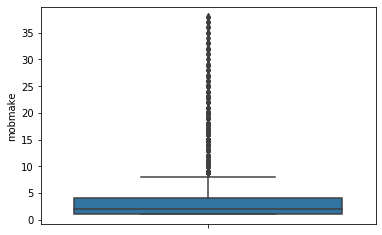

In [22]:
sns.boxplot(y='mobmake',data=data)

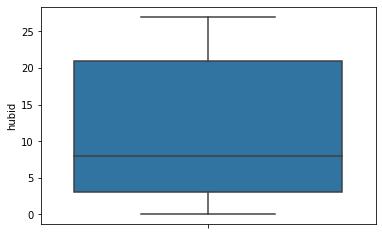

In [23]:
sns.boxplot(y='hubid',data=data)

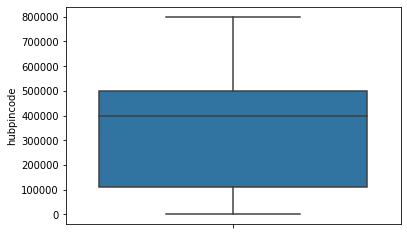

In [24]:
sns.boxplot(y='hubpincode',data=data)

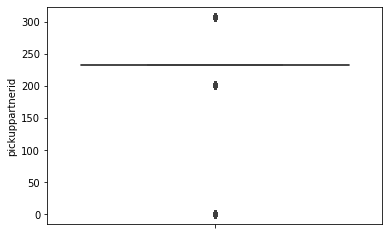

In [25]:
sns.boxplot(y='pickuppartnerid',data=data)

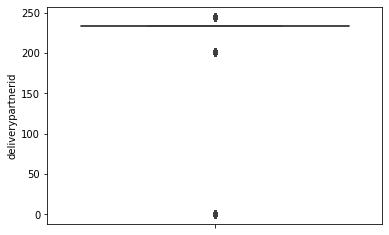

In [26]:
sns.boxplot(y='deliverypartnerid',data=data)

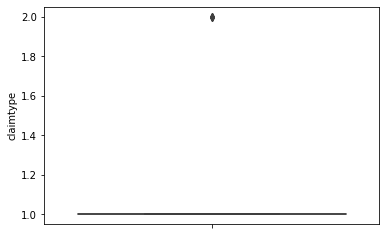

In [27]:
sns.boxplot(y='claimtype',data=data)

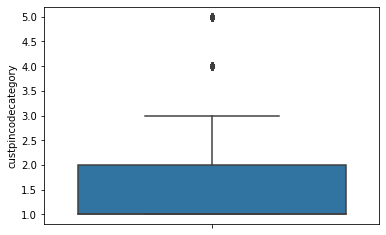

In [28]:
sns.boxplot(y='custpincodecategory',data=data)

##### Data Visualisation

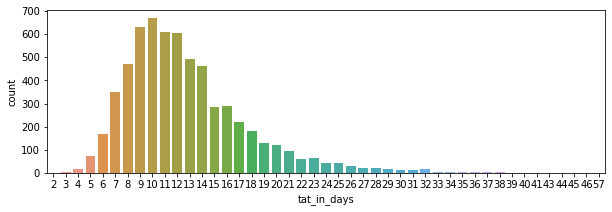

In [29]:
plt.figure(figsize=(10,3))
sns.countplot(x='tat_in_days',data=data)

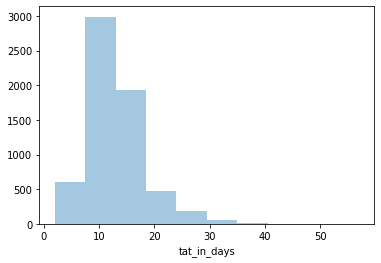

In [30]:
sns.distplot(data['tat_in_days'],kde=False,bins=10)

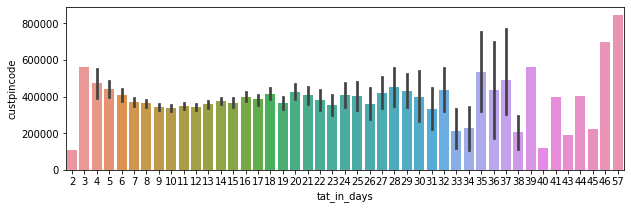

In [31]:
plt.figure(figsize=(10,3))
sns.barplot(x='tat_in_days',y='custpincode',data=data)

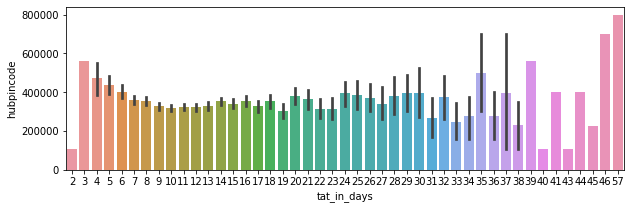

In [32]:
plt.figure(figsize=(10,3))
sns.barplot(x='tat_in_days',y='hubpincode',data=data)

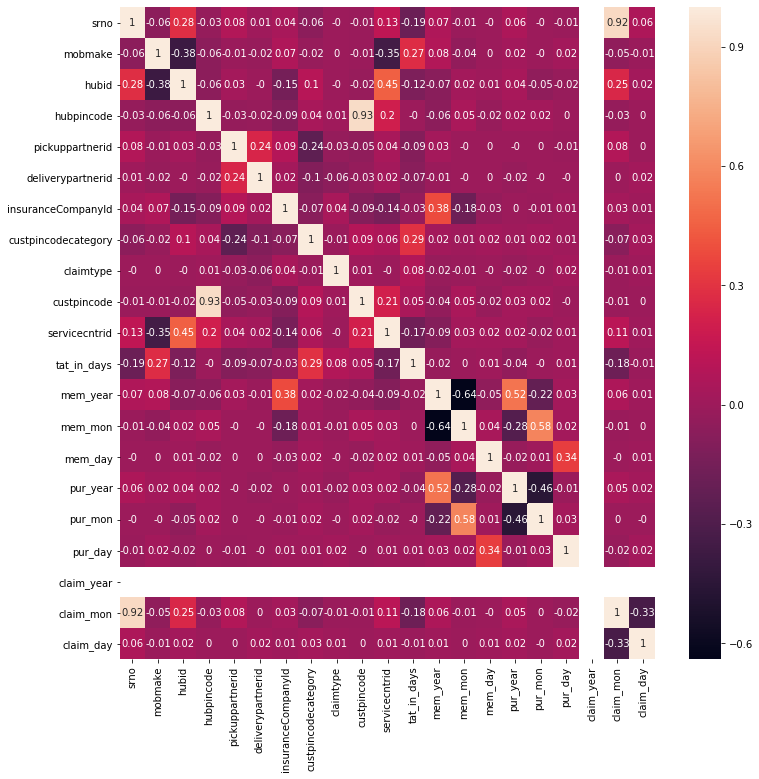

In [33]:
plt.figure(figsize=(12, 12))
correlation_matrix = data.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True)

### Finding co-relation btw variables having maximum +ve value in the heat map graph

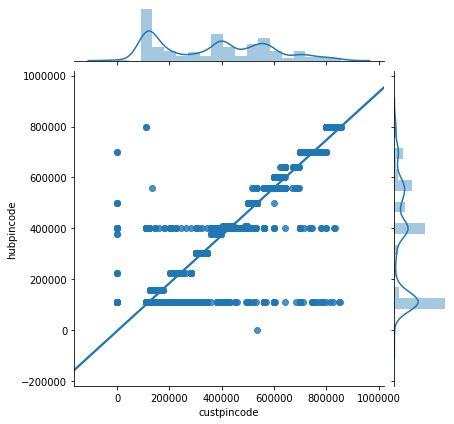

In [34]:
sns.jointplot("custpincode", "hubpincode", data=data, kind="reg")

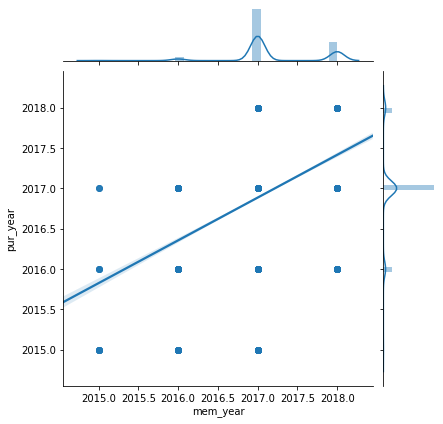

In [35]:
sns.jointplot("mem_year", "pur_year", data=data, kind="reg")

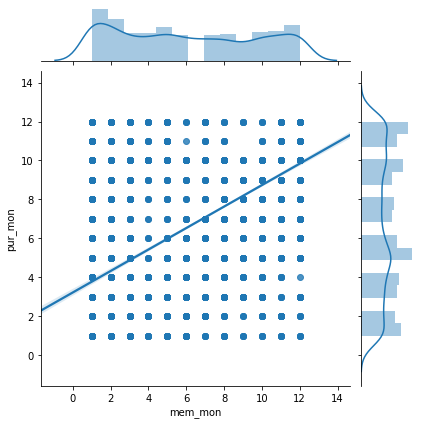

In [36]:
sns.jointplot("mem_mon", "pur_mon", data=data, kind="reg")

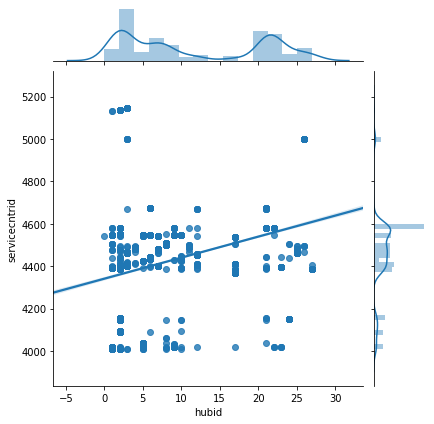

In [37]:
sns.jointplot("hubid", "servicecntrid", data=data, kind="reg")

##### Splitting data into dependent and independent variables

In [38]:
feature_cols=['srno','mobmake','hubid','hubpincode','pickuppartnerid','deliverypartnerid','insuranceCompanyId','custpincodecategory','claimtype','custpincode','servicecntrid','mem_year','mem_mon','mem_day','pur_year','pur_mon','pur_day','claim_year','claim_mon','claim_day','pick_year','pick_mon','pick_day']
X=data[feature_cols]
X.head()

,srno,mobmake,hubid,hubpincode,pickuppartnerid,deliverypartnerid,insuranceCompanyId,custpincodecategory,claimtype,custpincode,...,mem_day,pur_year,pur_mon,pur_day,claim_year,claim_mon,claim_day,pick_year,pick_mon,pick_day
0,2851218,1,7,500004,233,233,131,1,1,500001,...,27,2016,12,2,2018,2,8,2018,02,13
1,2838330,2,10,226010,233,233,131,1,1,226022,...,6,2017,3,5,2018,2,4,2018,02,08
2,2835781,2,2,110018,233,233,228,1,1,110018,...,1,2018,1,27,2018,2,3,2018,02,12
3,2838589,3,2,110018,233,233,228,2,1,124001,...,17,2018,1,31,2018,2,4,2018,02,14
4,2855214,1,21,110015,233,233,131,1,1,201301,...,23,2018,1,20,2018,2,9,2018,02,14


In [39]:
y=data['tat_in_days']

In [40]:
y.shape

(6250,)

##### Splitting the data into Training and Testing sets

In [41]:
#splitting X and y into training and testing sets
from sklearn.model_selection import train_test_split

In [42]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=1)

In [43]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(4687, 23)
(1563, 23)
(4687,)
(1563,)


In [44]:
# scaling of features
from sklearn.preprocessing import StandardScaler
sc_X=StandardScaler()
X_train=sc_X.fit_transform(X_train)
X_test=sc_X.transform(X_test)

##### Applying multi variable Linear Regression as the response is continous

In [45]:
from sklearn.linear_model import LinearRegression
linreg=LinearRegression()
linreg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [46]:
print(linreg.intercept_)
print(linreg.coef_)

12.679965863025412
[-8.02515521  1.14253843  0.09527298 -0.94014219  0.03292101 -0.10083014
 -0.12351339  1.33893141  0.44254795  1.05156612 -0.49398043 -0.01093473
  0.03714071  0.1108101  -0.230768   -0.15916976 -0.02049756  0.
  6.77026768  2.61314992  0.          0.86435571  0.33324496]


In [47]:
list(zip(feature_cols,linreg.coef_))

[('srno', -8.02515521300818),
 ('mobmake', 1.14253842550794),
 ('hubid', 0.09527297697641501),
 ('hubpincode', -0.9401421940937117),
 ('pickuppartnerid', 0.032921013296802915),
 ('deliverypartnerid', -0.10083013756133424),
 ('insuranceCompanyId', -0.12351339073521302),
 ('custpincodecategory', 1.3389314144405502),
 ('claimtype', 0.4425479520793968),
 ('custpincode', 1.051566119366478),
 ('servicecntrid', -0.49398043054120555),
 ('mem_year', -0.010934730427983319),
 ('mem_mon', 0.03714071334860107),
 ('mem_day', 0.11081010372564866),
 ('pur_year', -0.23076800417801693),
 ('pur_mon', -0.15916976115580844),
 ('pur_day', -0.020497564089678545),
 ('claim_year', 0.0),
 ('claim_mon', 6.770267684073572),
 ('claim_day', 2.613149921746824),
 ('pick_year', 0.0),
 ('pick_mon', 0.8643557145893381),
 ('pick_day', 0.33324496120254465)]

In [48]:
y_pred=linreg.predict(X_test)

In [49]:
import numpy as np
from sklearn import metrics
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

RMSE: 4.713373019975895


In [50]:
y_pred

array([12.231925  , 10.7521826 , 16.43148805, ..., 13.61286231,
       12.27904728, 11.72236317])

##### Polynomial Regression

In [51]:
from sklearn.preprocessing import PolynomialFeatures 
  
poly = PolynomialFeatures(degree = 2) 
X_poly = poly.fit_transform(X_train)  
lin2 = LinearRegression() 
lin2.fit(X_poly, y_train) 
y_pred=lin2.predict(poly.fit_transform(X_test))
#print('RMSE:',np.sqrt(metrics.mean_squared_error(y_pred,y_test)))

##### Decision tree

In [52]:
from sklearn.tree import DecisionTreeRegressor
dtr= DecisionTreeRegressor()
dtr.fit(X_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [53]:
y_pred = dtr.predict(X_test)

In [54]:
from sklearn.metrics import mean_squared_error 
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

RMSE: 6.117635478807764


##### Random Forest

In [55]:
# model 3
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 50, random_state = 0)

In [56]:
regressor.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=50,
                      n_jobs=None, oob_score=False, random_state=0, verbose=0,
                      warm_start=False)

In [57]:
y_pred = regressor.predict(X_test)

In [58]:
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

RMSE: 4.520832987637491


##### Gradient Boost Regression

In [59]:
from sklearn.ensemble import GradientBoostingRegressor

In [60]:
greg=GradientBoostingRegressor()

In [61]:
greg.fit(X_train,y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [62]:
y_pred=greg.predict(X_test)

In [63]:
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

RMSE: 4.436856113923659


#### Using Gradient Boost Regressor for solving the probelm

In [64]:
feature_cols=['srno','mobmake','hubid','hubpincode','pickuppartnerid','deliverypartnerid','insuranceCompanyId','custpincodecategory','claimtype','custpincode','servicecntrid','mem_year','mem_mon','mem_day','pur_year','pur_mon','pur_day','claim_year','claim_mon','claim_day','pick_year','pick_mon','pick_day']
X=data[feature_cols]
X.head()

,srno,mobmake,hubid,hubpincode,pickuppartnerid,deliverypartnerid,insuranceCompanyId,custpincodecategory,claimtype,custpincode,...,mem_day,pur_year,pur_mon,pur_day,claim_year,claim_mon,claim_day,pick_year,pick_mon,pick_day
0,2851218,1,7,500004,233,233,131,1,1,500001,...,27,2016,12,2,2018,2,8,2018,02,13
1,2838330,2,10,226010,233,233,131,1,1,226022,...,6,2017,3,5,2018,2,4,2018,02,08
2,2835781,2,2,110018,233,233,228,1,1,110018,...,1,2018,1,27,2018,2,3,2018,02,12
3,2838589,3,2,110018,233,233,228,2,1,124001,...,17,2018,1,31,2018,2,4,2018,02,14
4,2855214,1,21,110015,233,233,131,1,1,201301,...,23,2018,1,20,2018,2,9,2018,02,14


In [65]:
y=data['tat_in_days']

In [66]:
from sklearn.ensemble import GradientBoostingRegressor

In [67]:
greg=GradientBoostingRegressor()

In [68]:
greg.fit(X,y)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

##### Reading Test File

In [121]:
test_data=pd.read_csv('problem_2_test.csv')

In [122]:
test_data.head()

,srno,mobmake,hubid,hubpincode,pickuppartnerid,deliverypartnerid,insuranceCompanyId,custpincodecategory,claimtype,custpincode,memcreateddate,mobilepurchasedate,claimintdate,servicecntrid,pickupStartdate
0,2829088,AN,3,560011,233,233,131,A,ADLD,560093,2017-07-30,2017-07-27,2018-02-01,4467,2018-02-06
1,2829866,AJ,2,110018,233,233,228,A,ADLD,110034,2017-07-17,2017-01-25,2018-02-01,4388,2018-02-08
2,2894489,AJ,3,560011,233,233,228,C,ADLD,590014,2018-01-12,2018-01-11,2018-02-21,4460,2018-02-28
3,2876708,AJ,2,110018,233,233,228,B,ADLD,250110,2017-08-07,2017-05-21,2018-02-16,4388,2018-02-26
4,2890283,AN,22,400104,233,233,131,C,ADLD,496001,2017-11-10,2017-09-22,2018-02-20,4581,2018-02-23


In [123]:
test_data.shape

(2116, 15)

In [124]:
test_mobmake=test_data.mobmake

In [125]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2116 entries, 0 to 2115
Data columns (total 15 columns):
srno                   2116 non-null int64
mobmake                2116 non-null object
hubid                  2116 non-null int64
hubpincode             2116 non-null int64
pickuppartnerid        2116 non-null int64
deliverypartnerid      2116 non-null int64
insuranceCompanyId     2116 non-null int64
custpincodecategory    2116 non-null object
claimtype              2116 non-null object
custpincode            2116 non-null int64
memcreateddate         2116 non-null object
mobilepurchasedate     2116 non-null object
claimintdate           2116 non-null object
servicecntrid          2116 non-null int64
pickupStartdate        2116 non-null object
dtypes: int64(8), object(7)
memory usage: 190.1+ KB


In [126]:
test_data.mobmake.unique()

array(['AN', 'AJ', 'C', 'U', 'J', 'H', 'AD', 'AF', 'AI', 'D', 'S', 'AE',
       'AM', 'Y', 'AA', 'AB', 'G', 'F', 'Z', 'L', 'R', 'A', 'AH', 'AK',
       'O', 'Q', 'K', 'W', 'I', 'AC', 'T', 'AR', 'P', 'AG'], dtype=object)

In [127]:
arr=test_data.mobmake.unique()
dict_data={}
for i in range(0,len(arr),1):
    if arr[i] not in dict_data:
        dict_data[arr[i]]=i+1

In [128]:
test_data['mobmake']=test_data.mobmake.map(dict_data)

In [129]:
test_data.custpincodecategory.unique()

array(['A', 'C', 'B', 'D', '0'], dtype=object)

In [130]:
test_data['custpincodecategory']=test_data.custpincodecategory.map({'A':1,'B':2,'C':3,'D':4,'0':5})

In [131]:
test_data.claimtype.unique()

array(['ADLD', 'EW'], dtype=object)

In [132]:
test_data['claimtype']=test_data.claimtype.map({'ADLD':1,'EW':2})

In [133]:
arr=list(test_data.memcreateddate)
year=[]
mon=[]
day=[]
for a in arr:
    yr,mn,dy=a.split('-')
    year.append(int(yr))
    mon.append(int(mn))
    day.append(int(dy))
test_data['mem_year']=year
test_data['mem_mon']=mon
test_data['mem_day']=day

In [134]:
arr=list(test_data.mobilepurchasedate)
year=[]
mon=[]
day=[]
for a in arr:
    yr,mn,dy=a.split('-')
    year.append(int(yr))
    mon.append(int(mn))
    day.append(int(dy))
test_data['pur_year']=year
test_data['pur_mon']=mon
test_data['pur_day']=day

In [135]:
arr=list(test_data.claimintdate)
year=[]
mon=[]
day=[]
for a in arr:
    yr,mn,dy=a.split('-')
    year.append(int(yr))
    mon.append(int(mn))
    day.append(int(dy))
test_data['claim_year']=year
test_data['claim_mon']=mon
test_data['claim_day']=day

In [136]:
arr=list(test_data.pickupStartdate)
year=[]
mon=[]
day=[]
for a in arr:
    yr,mn,dy=a.split('-')
    year.append(yr)
    mon.append(mn)
    day.append(dy)
test_data['pick_year']=year
test_data['pick_mon']=mon
test_data['pick_day']=day

In [137]:
test_data.columns

Index(['srno', 'mobmake', 'hubid', 'hubpincode', 'pickuppartnerid',
       'deliverypartnerid', 'insuranceCompanyId', 'custpincodecategory',
       'claimtype', 'custpincode', 'memcreateddate', 'mobilepurchasedate',
       'claimintdate', 'servicecntrid', 'pickupStartdate', 'mem_year',
       'mem_mon', 'mem_day', 'pur_year', 'pur_mon', 'pur_day', 'claim_year',
       'claim_mon', 'claim_day', 'pick_year', 'pick_mon', 'pick_day'],
      dtype='object')

In [138]:
feature_cols=['srno','mobmake','hubid','hubpincode','pickuppartnerid','deliverypartnerid','insuranceCompanyId','custpincodecategory','claimtype','custpincode','servicecntrid','mem_year','mem_mon','mem_day','pur_year','pur_mon','pur_day','claim_year','claim_mon','claim_day','pick_year','pick_mon','pick_day']
X_test=test_data[feature_cols]
X_test.head()

,srno,mobmake,hubid,hubpincode,pickuppartnerid,deliverypartnerid,insuranceCompanyId,custpincodecategory,claimtype,custpincode,...,mem_day,pur_year,pur_mon,pur_day,claim_year,claim_mon,claim_day,pick_year,pick_mon,pick_day
0,2829088,1,3,560011,233,233,131,1,1,560093,...,30,2017,7,27,2018,2,1,2018,02,06
1,2829866,2,2,110018,233,233,228,1,1,110034,...,17,2017,1,25,2018,2,1,2018,02,08
2,2894489,2,3,560011,233,233,228,3,1,590014,...,12,2018,1,11,2018,2,21,2018,02,28
3,2876708,2,2,110018,233,233,228,2,1,250110,...,7,2017,5,21,2018,2,16,2018,02,26
4,2890283,1,22,400104,233,233,131,3,1,496001,...,10,2017,9,22,2018,2,20,2018,02,23


In [139]:
y_pred=greg.predict(X_test)
y_pred

array([ 9.83357736, 11.27549616, 12.41830681, ..., 13.97070252,
       12.37593698, 14.97420549])

In [140]:
test_data['tat_in_days']=y_pred

In [141]:
test_data.drop(['mem_year','mem_mon','mem_day','pur_year','pur_mon','pur_day','claim_year','claim_mon','claim_day','pick_year','pick_mon','pick_day'],axis=1,inplace=True)

In [142]:
test_data['claimtype']=test_data.claimtype.map({1:'ADLD',2:'EW'})

In [143]:
test_data['custpincodecategory']=test_data.custpincodecategory.map({1:'A',2:'B',3:'C',4:'D',5:'0'})

In [144]:
test_data['mobmake']=test_mobmake

In [145]:
test_data.to_csv('DikshaSingla_problem_2_result.csv',index=False)